# bulbea
> Stock Market Predictor and Model Builder

![](bulbea.png)

Go ahead and `import` `bulbea` as follows:

In [31]:
import bulbea as bb

In order to analyse a desired share, we use the `Share` object defined under `bulbea` that considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [32]:
source, symbol, alias = 'YAHOO', 'GOOGL', 'Google'

Go ahead and create a `Share` object as follows:

In [33]:
share = bb.Share(source, symbol, alias)

By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [34]:
data     = share.data
nsamples = 5
data.tail(nsamples)

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2017-03-02,856.309998,856.489990,848.719971,849.849976,1248600.0,849.849976
2017-03-03,848.940002,850.820007,844.710022,849.080017,1005000.0,849.080017
2017-03-06,846.859985,848.940002,841.169983,847.270020,1046300.0,847.270020
2017-03-07,847.260010,853.330017,845.520020,851.150024,1029500.0,851.150024
2017-03-08,853.119995,856.929993,851.250000,853.640015,1028800.0,853.640015


In order to analyse a given attribute, you could plot the same as follows:

In [35]:
import matplotlib.pyplot as pplt
pplt.style.use('fivethirtyeight')

% matplotlib inline

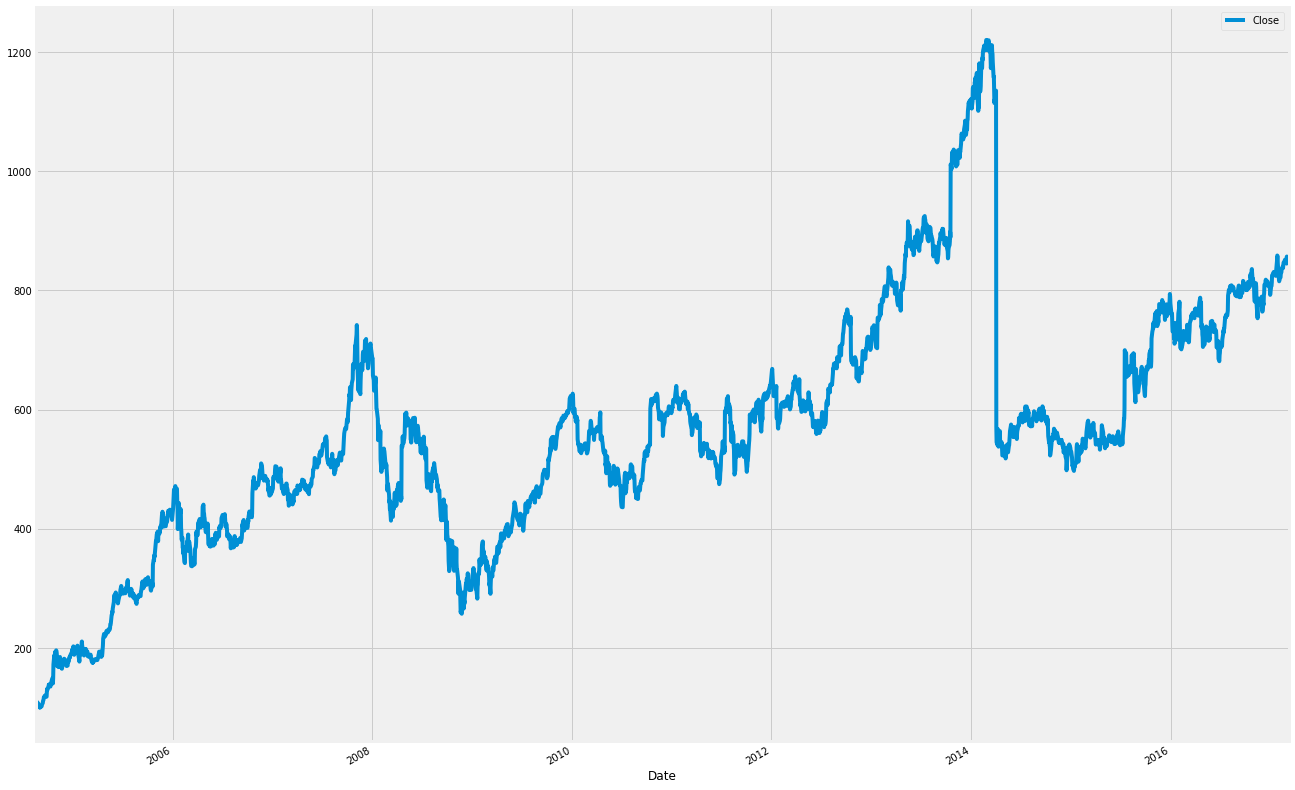

In [36]:
data[['Close']].plot(figsize = (20, 15))

### Training & Testing

In [37]:
from bulbea.learn.evaluation import split

In [38]:
Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

In [39]:
import numpy as np

In [40]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest,  ( Xtest.shape[0],  Xtest.shape[1], 1))

### Modelling

In [41]:
layers      = [1, 100, 100, 1] # number of neurons in each layer
nbatch      = 512              
epochs      = 1                
nvalidation = 0.05

In [42]:
from bulbea.learn.models import RNN
from bulbea.learn.models.ann import RNNCell

In [43]:
rnn = RNN(layers, cell = RNNCell.LSTM)

#### TRAINING

In [49]:
rnn.fit(Xtrain, ytrain,
        batch_size       = nbatch,
        nb_epoch         = epochs,
        validation_split = nvalidation)

Train on 1783 samples, validate on 94 samples
Epoch 1/1
1783/1783 [==============================] - 0s - loss: 6.5947e-04 - val_loss: 3.1927e-04


#### TESTING

In [50]:
predicted = rnn.predict(Xtest)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mean_squared_error(ytest, predicted)

0.00044963269433573094

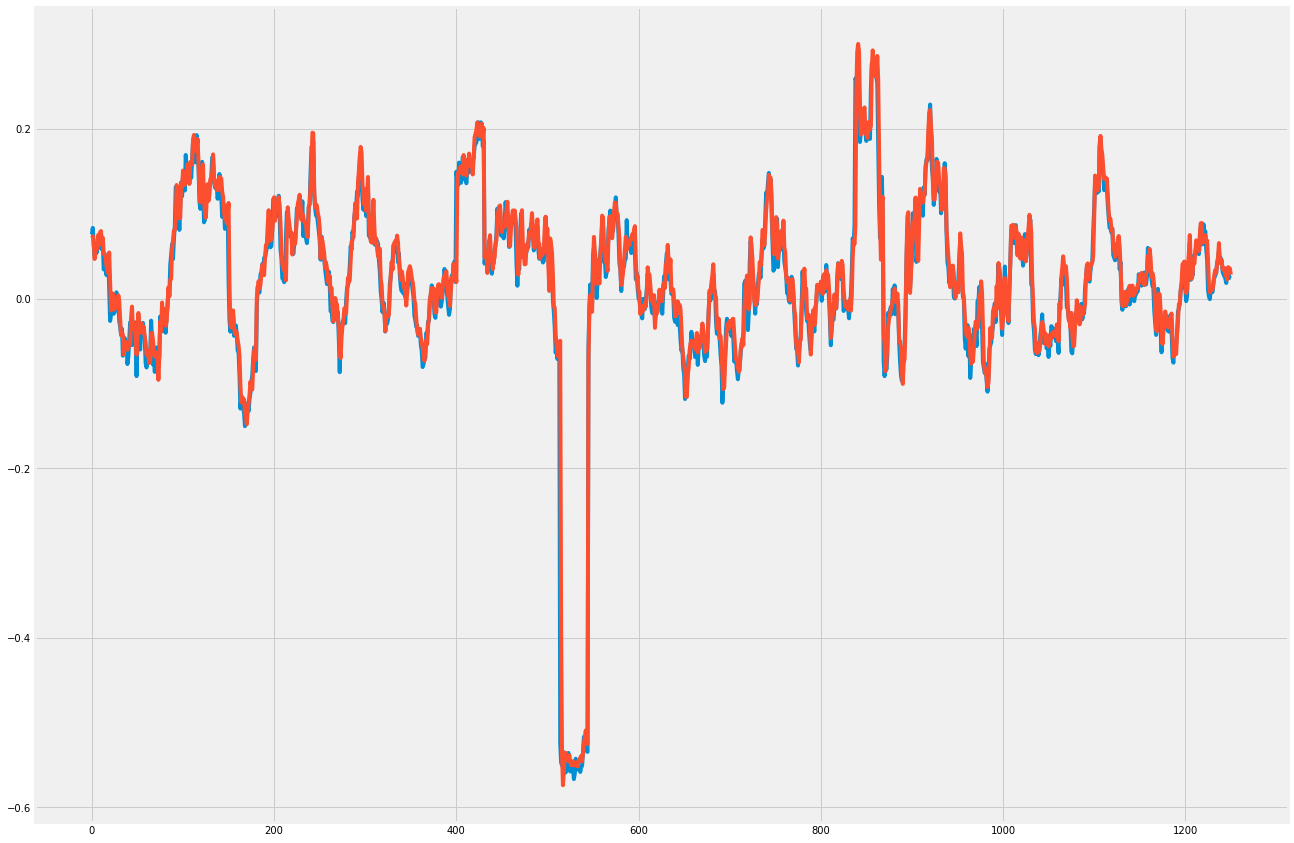

In [53]:
figsize   = (20, 15)
figure    = pplt.figure(figsize = figsize)

axes      = figure.add_subplot(111)
axes.plot(ytest)
axes.plot(predicted)

### Sentiment Analysis

In [54]:
s = bb.sentiment(share)
s

0.09999999999999999

### Launching the App

In [27]:
app = bb.App()
app.run()